# Data analysis for CSP 11C

Available results: `Calgary CAU-Kiel CSIRO CTC-CNE GEOS1 GEOS2 IFPEN OpenGoSim1 OpenGoSim2 OPM1 OPM2 OPM3 OPM4 Pau-Inria PFLOTRAN SINTEF1 SINTEF2 SINTEF3 SLB TetraTech1 TetraTech2 UT-CSEE`.

## Computing the SPE11 distance

Run the data analysis and compute the SPE11 distance between all selected results.
With the `-g` option, sparse data are selected as submitted by the respective
participants, where `-f` specifies the corresponding folder for all results.
Alternatively, the `-c` options take, for selected quantities, values
post-processed from the submitted dense data that reside in the folder
specified by `-t`, particularly, `-cAB` related to Boxes A and B, `-cC` related to Box C. Moreover, the `-zBCO2` option stes the boundary CO2 sparse data to zero.

The results can be displayed and stored in the output folder, defined by the `-o` option. This includes a distance matrix which will be used for further detailed analysis below.

In [1]:
%matplotlib inline
%run ../analysis/compute_spe11_distance.py \
-v spe11c \
-f ../shared_folder/data \
-t ../shared_folder/evaluation \
-o output/spe11c \
-g Calgary CAU-Kiel CSIRO CTC-CNE GEOS1 GEOS2 \
   IFPEN OpenGoSim1 OpenGoSim2 OPM1 OPM2 OPM3 OPM4 \
   Pau-Inria PFLOTRAN SINTEF1 SINTEF2 SINTEF3 \
   SLB TetraTech1 TetraTech2 UT-CSEE \
-cAB Calgary CTC-CNE OpenGoSim1 OpenGoSim2 PFLOTRAN \
-cC Calgary CAU-Kiel CTC-CNE Pau-Inria PFLOTRAN SINTEF1 SINTEF2 SINTEF3 SLB \
-cBCO2 PFLOTRAN

C:\Users\jbo062\src\others\11thSPE-CSP\analysis\utilities.py:87: UserWarning: Results missing for spe11c - skipping ..\shared_folder\data\darts.
  warn(f"Results missing for {spe_case.variant} - skipping {team}.")
C:\Users\jbo062\src\others\11thSPE-CSP\analysis\utilities.py:87: UserWarning: Results missing for spe11c - skipping ..\shared_folder\data\kfupm.
  warn(f"Results missing for {spe_case.variant} - skipping {team}.")
C:\Users\jbo062\src\others\11thSPE-CSP\analysis\utilities.py:87: UserWarning: Results missing for spe11c - skipping ..\shared_folder\data\rice.
  warn(f"Results missing for {spe_case.variant} - skipping {team}.")
C:\Users\jbo062\src\others\11thSPE-CSP\analysis\utilities.py:87: UserWarning: Results missing for spe11c - skipping ..\shared_folder\data\stuttgart.
  warn(f"Results missing for {spe_case.variant} - skipping {team}.")



Distance matrix stored in output\spe11c\spe11c_distance_matrix.csv
Statistics stored in output\spe11c\spe11c_statistics.csv


## Inspecting the distance matrix
The above computation has stored the distance matrix to file `output/spe11c/spe11c_distance_matrix.csv`. We can fetch and display it.

In [2]:
import pandas as pd
df = pd.read_csv('output/spe11c/spe11c_distance_matrix.csv', index_col=0)

# Uncomment for a quick look at the distance matrix
#df

The script `analyze_distance_matrix` offers further tools for inspection, including visualization, but also determining minimal values.

We start with visualizing the full distance matrix. For this, provide the option `-option show-distance-matrix`.

Saved heatmap to output\spe11c\spe11c_heatmap_distance_matrix.png.


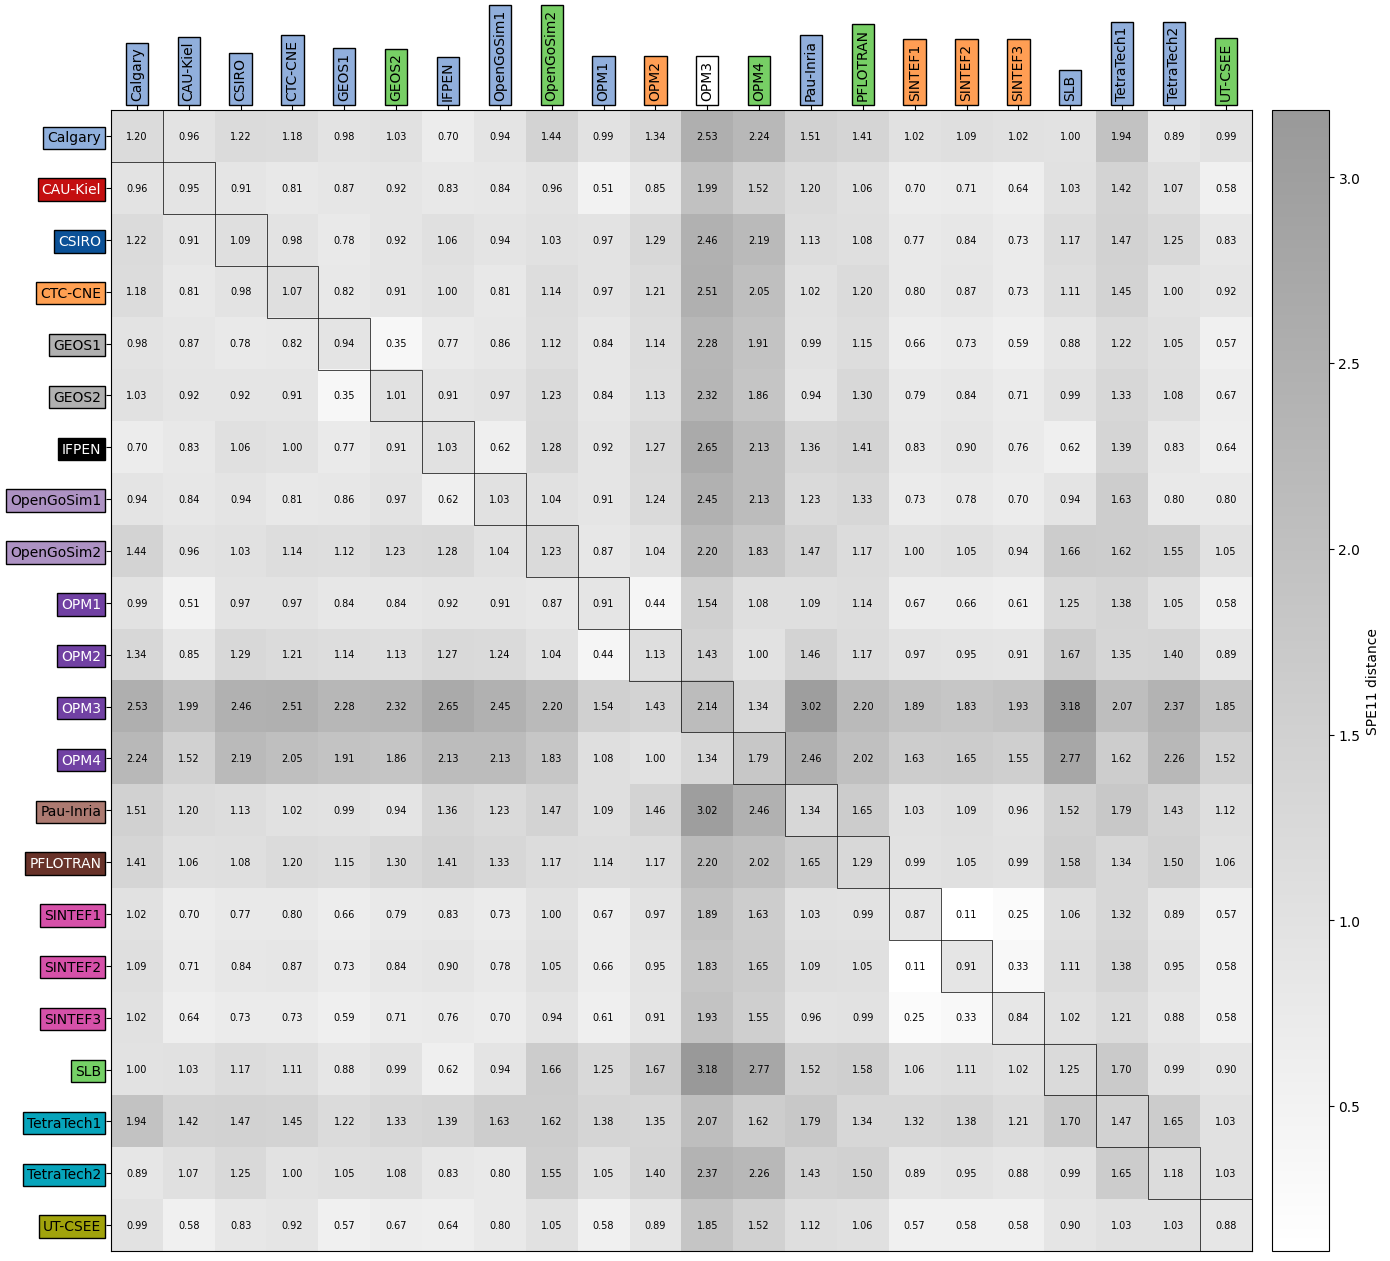

<Figure size 640x480 with 0 Axes>

In [3]:
%run ../analysis/analyze_distance_matrix.py \
-option show-distance-matrix \
-v spe11c \
-o output/spe11c

The respective image of the distance matrix is printed to file `output/spe11c/spe11c_distance_matrix.png`.

By specifying single groups through `-g`, one can extract a subset of the distance matrix for closer inspection.  NOTE: The next code block overwrites the image.

In [4]:
#%run ../analysis/analyze_distance_matrix.py \
#-option show-distance-matrix \
#-v spe11c \
#-o output/spe11c \
#-g GEOS2 OpenGoSim1 OPM4 SINTEF3

## Extracting single distances
We can extract single pairwise distances through the option `-option print-distances` together with a selection of groups thorugh `-g`.

### Example analysis: Different groups using the same simulator / Same groups using different simulators
E.g. we can inspect the use of OPM Flow and SLB IX by different groups, in constrast to same groups using different simulators.

In [16]:
%run ../analysis/analyze_distance_matrix.py \
-option print-distances \
-v spe11c \
-o output/spe11c \
-g OPM1 CAU-Kiel \
-g CTC-CNE SLB \
-g TetraTech1 TetraTech2

Distance between OPM1 and CAU-Kiel: 0.5138882679365356
Distance between CTC-CNE and SLB: 1.113217161297015
Distance between TetraTech1 and TetraTech2: 1.6511809953305645


### Example analysis: Mesh refinement
We can also inspect the effect of grid refinement, studied by single groups.

In [38]:
%run ../analysis/analyze_distance_matrix.py \
-option print-distances \
-v spe11c \
-o output/spe11c \
-g GEOS1 GEOS2 \
-g OpenGoSim1 OpenGoSim2 \
-g GEOS2 OpenGoSim2

Distance between GEOS1 and GEOS2: 0.3507734064136079
Distance between OpenGoSim1 and OpenGoSim2: 1.043542711066445
Distance between GEOS2 and OpenGoSim2: 1.2346731301474048


### Example analysis: Unstructured grids
We inspect the submissions using unstructured grids.

In [ ]:
%run ../analysis/analyze_distance_matrix.py \
-option print-distances \
-v spe11c \
-o output/spe11c \
-g GEOS1 GEOS2 \
-g OpenGoSim1 OpenGoSim2 \
-g GEOS2 OpenGoSim2

Distance between GEOS1 and GEOS2: 0.3507734064136079
Distance between OpenGoSim1 and OpenGoSim2: 1.043542711066445
Distance between GEOS2 and OpenGoSim2: 1.2346731301474048


## Medians and correlations
The SPE11 distance uses scalings for each considered reporting quantity. It is essentially based on a median value of the distances of each type of quantity. Then the total SPE11 distance agglomerates the single distances, resulting in the natural question how well the single distances correlate to the global distance. The Pearson correlation coefficient (PCC) offers a quantitative measure. As part of the computation of the SPE11 distance, these statistics are recorded in the output folder as `spe11b_statistics.csv`

In [39]:
import pandas as pd
df = pd.read_csv('output/spe11c/spe11c_statistics.csv')
df

,Unnamed: 0,Median,PCC
0,mobA,2.266341e+14,0.391042
1,immA,8.341246e+12,0.546012
2,dissA,1.305797e+14,0.426935
3,mobB,3.914405e+11,0.780085
4,immB,7.884494e+10,0.792256
5,dissB,1.384430e+10,0.761880
6,mC,1.243468e+11,0.482796
7,sealTot,1.957237e+13,0.122752
8,boundaryCO2,4.705047e+13,0.056212
9,early_pressure_l2s,1.269306e+11,0.019323


## Visualization of clustering
The distance matrix provides means for linkage clustering vilsualized by a dendrogram. Using the option `-option show-clustering` the dendrogram is displayed and stored to file.

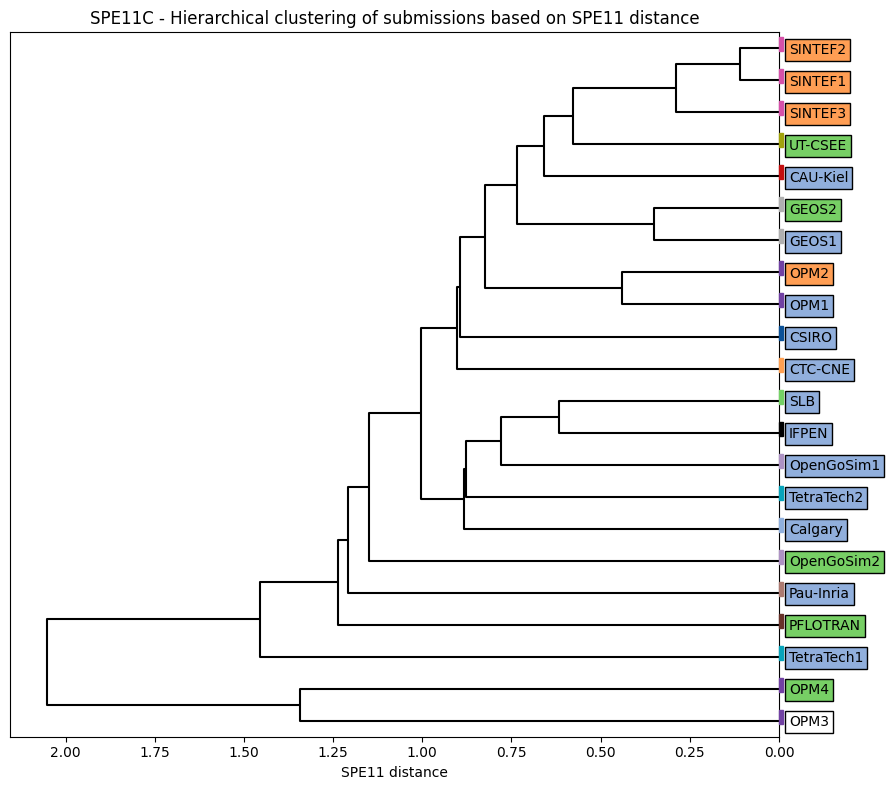

<Figure size 640x480 with 0 Axes>

In [40]:
%run ../analysis/analyze_distance_matrix.py \
-option show-clustering \
-v spe11c \
-o output/spe11c

# Finding the smallest mean distance (median result)
We define the median submission to be the submission with lowest average mean to all other submissions. For this we call the script `analyze_distance_matrix` and specify the option `-option find-min-mean-distance`. We can make a selection of groups selected for the analysis using `-g`.

In [41]:
%run ../analysis/analyze_distance_matrix.py \
-option find-min-mean-distance \
-v spe11c \
-o output/spe11c \
-g Calgary CAU-Kiel CSIRO CTC-CNE GEOS1 GEOS2 \
   IFPEN OpenGoSim1 OpenGoSim2 OPM1 OPM2 OPM3 OPM4 \
   Pau-Inria PFLOTRAN SINTEF1 SINTEF2 SINTEF3 SLB \
   TetraTech1 TetraTech2 UT-CSEE


--------------------------------------------------------------------------------
MINIMUM AG MEAN DISTANCE:
--------------------------------------------------------------------------------

Within the group:
[['Calgary', 'CAU-Kiel', 'CSIRO', 'CTC-CNE', 'GEOS1', 'GEOS2', 'IFPEN', 'OpenGoSim1', 'OpenGoSim2', 'OPM1', 'OPM2', 'OPM3', 'OPM4', 'Pau-Inria', 'PFLOTRAN', 'SINTEF1', 'SINTEF2', 'SINTEF3', 'SLB', 'TetraTech1', 'TetraTech2', 'UT-CSEE']]
With distance 0.8390082617694545 and std 0.3344274975176049.
The group with the smallest mean distance to all other participants is:
SINTEF3



## Finding the smallest pair-wise distance
By using the option `-option find-min-distance`, we can search for the smallest distance between two distinct submissions among the provided groups. Again, we can restrict the analysis to a subset using `-g`.

In [42]:
%run ../analysis/analyze_distance_matrix.py \
-option find-min-distance \
-v spe11c \
-o output/spe11c \
-g Calgary CAU-Kiel CSIRO CTC-CNE GEOS1 GEOS2 \
   IFPEN OpenGoSim1 OpenGoSim2 OPM1 OPM2 OPM3 OPM4 \
   Pau-Inria PFLOTRAN SINTEF1 SINTEF2 SINTEF3 SLB \
   TetraTech1 TetraTech2 UT-CSEE


--------------------------------------------------------------------------------
MINIMUM DISTANCE:
--------------------------------------------------------------------------------

The minimum distance is 0.1098598530389953 between SINTEF1 and SINTEF2.


## Finding the smallest group-wise distance
By adding multiple groups through repeated use of `-g`, one introduces a collection of subgroups. For the option `-option find-min-distance`, the use of multiple subgroups, allows for excluding group-intern comparisons within the single selections. Using this, one can analyze e.g. the smallest distance between submissions from different groups.

In [43]:
%run ../analysis/analyze_distance_matrix.py \
-option find-min-distance \
-v spe11c \
-o output/spe11c \
-g Calgary \
-g CAU-Kiel \
-g CSIRO \
-g CTC-CNE \
-g GEOS1 GEOS2 \
-g IFPEN \
-g OpenGoSim1 OpenGoSim2 \
-g OPM1 OPM2 OPM3 OPM4 \
-g Pau-Inria \
-g PFLOTRAN \
-g SINTEF1 SINTEF2 SINTEF3 \
-g SLB \
-g TetraTech1 TetraTech2 \
-g UT-CSEE


--------------------------------------------------------------------------------
MINIMUM DISTANCE:
--------------------------------------------------------------------------------

The minimum distance is 0.5138882679365356 between CAU-Kiel and OPM1.


# Variability analysis (all submissions)

We can compute the variability in a single group. For this, we specify the group through `-g`. For example, we can compute the overall variability.

In [44]:
%run ../analysis/variability_analysis.py \
-v spe11c \
-o output/spe11c \
-g Calgary CAU-Kiel CSIRO CTC-CNE GEOS1 GEOS2 \
   IFPEN OpenGoSim1 OpenGoSim2 OPM1 OPM2 OPM3 OPM4 \
   Pau-Inria PFLOTRAN SINTEF1 SINTEF2 SINTEF3 SLB \
   TetraTech1 TetraTech2 UT-CSEE


--------------------------------------------------------------------------------
VARIABILITY ANALYSIS:
--------------------------------------------------------------------------------

The mean distance among the 22 groups
[['Calgary', 'CAU-Kiel', 'CSIRO', 'CTC-CNE', 'GEOS1', 'GEOS2', 'IFPEN', 'OpenGoSim1', 'OpenGoSim2', 'OPM1', 'OPM2', 'OPM3', 'OPM4', 'Pau-Inria', 'PFLOTRAN', 'SINTEF1', 'SINTEF2', 'SINTEF3', 'SLB', 'TetraTech1', 'TetraTech2', 'UT-CSEE']]
is 1.1297106303298106 +- 0.05536409266935727 (margin of error) based on 
with a standard deviation of 0.507455702913046.


Similarly, we can ask for the baseline variability. For this, we need to specify the baseline group as input. For SPE11B, these are `Calgary`, `CAU-Kiel`, `CSIRO`, `CTC-CNE`, `GEOS1`, `IFPEN`, `OpenGoSim1`, `OPM1`, `Pau-Inria`, `SLB`, `Tetratech1`, `Tetratech2`.

In [45]:
%run ../analysis/variability_analysis.py \
-v spe11c \
-o output/spe11c \
-g Calgary CAU-Kiel CSIRO CTC-CNE GEOS1 IFPEN OpenGoSim1 OPM1 Pau-Inria \
SLB TetraTech1 TetraTech2


--------------------------------------------------------------------------------
VARIABILITY ANALYSIS:
--------------------------------------------------------------------------------

The mean distance among the 12 groups
[['Calgary', 'CAU-Kiel', 'CSIRO', 'CTC-CNE', 'GEOS1', 'IFPEN', 'OpenGoSim1', 'OPM1', 'Pau-Inria', 'SLB', 'TetraTech1', 'TetraTech2']]
is 1.0569424725192507 +- 0.06442584111866312 (margin of error) based on 
with a standard deviation of 0.29377029963955303.


# Statistical analysis (comparison of variability)

## Baseline variability vs. overall variability

We can compute p-values of null-hypotheses comparing the variability of two groups, quantifying the statistical significance. E.g. we analyze whether the base case group has smaller variability than the overall variability. For this, we specify `-g-smaller` and `g-greater`, here being the base case group and all groups, respectively. 

In [46]:
%run ../analysis/variability_analysis.py \
-v spe11c \
-o output/spe11c \
-g-smaller Calgary CAU-Kiel CSIRO CTC-CNE GEOS1 IFPEN \
   OpenGoSim1 OPM1 Pau-Inria SLB TetraTech1 TetraTech2 \
-g-greater Calgary CAU-Kiel CSIRO CTC-CNE GEOS1 GEOS2 \
   IFPEN OpenGoSim1 OpenGoSim2 OPM1 OPM2 OPM3 OPM4 \
   Pau-Inria PFLOTRAN SINTEF1 SINTEF2 SINTEF3 SLB \
   TetraTech1 TetraTech2 UT-CSEE


--------------------------------------------------------------------------------
COMPARATIVE VARIABILITY ANALYSIS:
--------------------------------------------------------------------------------

The mean distance among the 1 groups
[['Calgary', 'CAU-Kiel', 'CSIRO', 'CTC-CNE', 'GEOS1', 'IFPEN', 'OpenGoSim1', 'OPM1', 'Pau-Inria', 'SLB', 'TetraTech1', 'TetraTech2']]
is 1.0569424725192507 +- 0.06442584111866312 (margin of error) based on 
with a standard deviation of 0.29377029963955303.

The mean distance among the 1 groups
[['Calgary', 'CAU-Kiel', 'CSIRO', 'CTC-CNE', 'GEOS1', 'GEOS2', 'IFPEN', 'OpenGoSim1', 'OpenGoSim2', 'OPM1', 'OPM2', 'OPM3', 'OPM4', 'Pau-Inria', 'PFLOTRAN', 'SINTEF1', 'SINTEF2', 'SINTEF3', 'SLB', 'TetraTech1', 'TetraTech2', 'UT-CSEE']]
is 1.1297106303298106 +- 0.05536409266935727 (margin of error) based on 
with a standard deviation of 0.507455702913046.

The hypothesis that the variability within
[['Calgary', 'CAU-Kiel', 'CSIRO', 'CTC-CNE', 'GEOS1', 'IFPEN', 'Open

## Commercial vs. academic/open-source simulators
Similarly, we can copute the p-value of the comparison of commercial and academic/open-source against all base case groups. 

The commercial group is given by: `CTC-CNE`, `SLB`, `TetraTech2`

In [47]:
%run ../analysis/variability_analysis.py \
-v spe11c \
-o output/spe11c \
-g-smaller CTC-CNE SLB TetraTech2 \
-g-greater Calgary CAU-Kiel CSIRO CTC-CNE GEOS1 IFPEN \
   OpenGoSim1 OPM1 Pau-Inria SLB TetraTech1 TetraTech2


--------------------------------------------------------------------------------
COMPARATIVE VARIABILITY ANALYSIS:
--------------------------------------------------------------------------------

The mean distance among the 1 groups
[['CTC-CNE', 'SLB', 'TetraTech2']]
is 1.0344584450321643 +- 0.06277535057657202 (margin of error) based on 
with a standard deviation of 0.0552830636819448.

The mean distance among the 1 groups
[['Calgary', 'CAU-Kiel', 'CSIRO', 'CTC-CNE', 'GEOS1', 'IFPEN', 'OpenGoSim1', 'OPM1', 'Pau-Inria', 'SLB', 'TetraTech1', 'TetraTech2']]
is 1.0569424725192507 +- 0.06442584111866312 (margin of error) based on 
with a standard deviation of 0.29377029963955303.

The hypothesis that the variability within
[['CTC-CNE', 'SLB', 'TetraTech2']]
is smaller than the variability within
[['Calgary', 'CAU-Kiel', 'CSIRO', 'CTC-CNE', 'GEOS1', 'IFPEN', 'OpenGoSim1', 'OPM1', 'Pau-Inria', 'SLB', 'TetraTech1', 'TetraTech2']]
has a p-value of 0.31382443671110194.



The academic/open-source group is given by: `Calgary`, `CAU-Kiel`, `CSIRO`, `GEOS1`, `IFPEN`, `OpenGoSim`, `OPM1`, `Pau-Inria`, `TetraTech1`.

In [48]:
%run ../analysis/variability_analysis.py \
-v spe11c \
-o output/spe11c \
-g-smaller Calgary CAU-Kiel CSIRO GEOS1 IFPEN OpenGoSim1 \
   OPM1 Pau-Inria TetraTech1 \
-g-greater Calgary CAU-Kiel CSIRO CTC-CNE GEOS1 GEOS2 \
   IFPEN OpenGoSim1 OPM1 Pau-Inria SLB TetraTech1 TetraTech2


--------------------------------------------------------------------------------
COMPARATIVE VARIABILITY ANALYSIS:
--------------------------------------------------------------------------------

The mean distance among the 1 groups
[['Calgary', 'CAU-Kiel', 'CSIRO', 'GEOS1', 'IFPEN', 'OpenGoSim1', 'OPM1', 'Pau-Inria', 'TetraTech1']]
is 1.0579333412291925 +- 0.09625389735911716 (margin of error) based on 
with a standard deviation of 0.32317446953335227.

The mean distance among the 1 groups
[['Calgary', 'CAU-Kiel', 'CSIRO', 'CTC-CNE', 'GEOS1', 'GEOS2', 'IFPEN', 'OpenGoSim1', 'OPM1', 'Pau-Inria', 'SLB', 'TetraTech1', 'TetraTech2']]
is 1.0367522998690162 +- 0.0576630334792918 (margin of error) based on 
with a standard deviation of 0.28636481844079076.

The hypothesis that the variability within
[['Calgary', 'CAU-Kiel', 'CSIRO', 'GEOS1', 'IFPEN', 'OpenGoSim1', 'OPM1', 'Pau-Inria', 'TetraTech1']]
is smaller than the variability within
[['Calgary', 'CAU-Kiel', 'CSIRO', 'CTC-CNE', 'GEOS1'